# Klasifikasi Bahasa Isyarat Menggunakan Metode CNN

In [65]:
! pip install kaggle

In [66]:
from os import mkdir

In [67]:
! mkdir "~/.kaggle"

In [68]:
! cp "kaggle.json ~/.kaggle/"

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [69]:
! chmod 600 ~/.kaggle/kaggle.json

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [70]:
! kaggle datasets download -d prathumarikeri/indian-sign-language-isl


  0%|          | 0.00/281M [00:00<?, ?B/s]
  0%|          | 1.00M/281M [00:00<02:00, 2.43MB/s]
  1%|          | 2.00M/281M [00:01<02:23, 2.04MB/s]
  1%|          | 3.00M/281M [00:01<02:54, 1.67MB/s]
  1%|▏         | 4.00M/281M [00:02<02:41, 1.80MB/s]
  2%|▏         | 5.00M/281M [00:03<03:03, 1.58MB/s]
  2%|▏         | 6.00M/281M [00:03<02:59, 1.61MB/s]
  2%|▏         | 7.00M/281M [00:04<02:45, 1.74MB/s]
  3%|▎         | 8.00M/281M [00:04<02:54, 1.64MB/s]
  3%|▎         | 9.00M/281M [00:05<02:43, 1.74MB/s]
  4%|▎         | 10.0M/281M [00:06<02:45, 1.72MB/s]
  4%|▍         | 11.0M/281M [00:06<02:44, 1.72MB/s]
  4%|▍         | 12.0M/281M [00:07<02:31, 1.85MB/s]
  5%|▍         | 13.0M/281M [00:07<02:26, 1.91MB/s]
  5%|▍         | 14.0M/281M [00:08<02:40, 1.74MB/s]
  5%|▌         | 15.0M/281M [00:09<02:50, 1.63MB/s]
  6%|▌         | 16.0M/281M [00:09<03:01, 1.53MB/s]
  6%|▌         | 17.0M/281M [00:10<03:00, 1.53MB/s]
  6%|▋         | 18.0M/281M [00:11<03:00, 1.53MB/s]
  7%|▋         | 19.

## Untuk mengekstrak file

In [76]:
# selanjutnya kita akan mengekstrak filenya menggunakan library zipfile
import zipfile
file = zipfile.ZipFile("indian-sign-language-isl.zip")
file.extractall("/content/")
# untuk mengekstrak file nya dan memindahkan ke folder content


In [84]:
import glob # glob ini berfungsi mengambil semua file yg ada dalam directory dalam format tertentu
images = glob.glob(r"C:/Users/CIA/Downloads/Klasifikasi Bahasa Isyarat/bahasaisyarat/indian-sign-language-isl - Copy/Indian/*.jpg") # disini saya mnegambil file dari path tersebut lalu (.jpg karena ingin mengetahui ada berapa gambarnya
print(f"total gambar = {len(images)}")

total gambar = 0


# Mengimport Library
- Conv2D = bertujuan untuk mengubah satu buah citra berdasarkan satu buah kernel
- Dense = untuk menambahkan layer
- Droupout = untuk menghindari overviting
- 

In [85]:
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator


# Prepare Data

In [87]:
from numpy.random.mtrand import shuffle
data = r"C:/Users/CIA/Downloads/Klasifikasi Bahasa Isyarat/bahasaisyarat/indian-sign-language-isl - Copy/Indian/"
targetsize = (128, 128) #diambil dari ukuran gambarnya tadi
classes = 35 

# buat image data generatornya dulu :
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.1,
                                   horizontal_flip=False,
                                   validation_split=0.2) # pembagian datanya untuk training 80% dan testing 20%

train_gen = train_datagen.flow_from_directory(data, target_size=targetsize,
                                              shuffle= True,
                                              batch_size= 32,
                                              color_mode="rgb",
                                              class_mode="categorical",
                                              subset="training")

val_gen = train_datagen.flow_from_directory(data, target_size=targetsize,
                                              shuffle= False,
                                              batch_size= 32,
                                              color_mode="rgb",
                                              class_mode="categorical",
                                              subset="validation")






Found 34198 images belonging to 35 classes.
Found 8547 images belonging to 35 classes.


# Create Model

In [88]:
from keras.layers.pooling import MaxPooling2D
model = Sequential()
# disini kita akan konvolusikan dengan 32 filter :
model.add(Conv2D(32, kernel_size=3, strides=1, activation="relu",padding="same", input_shape=(128,128,3)))
# strides = pergeseran setiap kernelnya 
model.add(MaxPooling2D(pool_size = (3,3), strides=2))

# selanjutnya konvolusikan dengan 64 filter :
model.add(Conv2D(64, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size = (2,2), strides=2))

# selanjutnya konvolusikan dengan 64 filter :
model.add(Conv2D(64, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size = (2,2), strides=2))

# selanjutnya konvolusikan dengan 128 filter :
model.add(Conv2D(128, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size = (2,2), strides=1))

# Flatten
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dense(classes, activation="softmax"))

model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])




# Menampilkan Model 

In [89]:
model.summary() # untuk menampilkan model yg telah kita buat

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 64)      

# Compile Model

In [90]:
history = model.fit(train_gen,
      steps_per_epoch=8,  
      epochs=25,
      verbose=1,
      validation_data = val_gen,
      validation_steps=8)

Epoch 1/25
8/8 [==============================] - 13s 1s/step - loss: 3.3597 - accuracy: 0.1055 - val_loss: 2.7078 - val_accuracy: 0.6445
Epoch 2/25
8/8 [==============================] - 10s 1s/step - loss: 1.5698 - accuracy: 0.6758 - val_loss: 0.9072 - val_accuracy: 0.7969
Epoch 3/25
8/8 [==============================] - 10s 1s/step - loss: 0.3779 - accuracy: 0.9141 - val_loss: 0.0649 - val_accuracy: 0.9883
Epoch 4/25
8/8 [==============================] - 9s 1s/step - loss: 0.1281 - accuracy: 0.9648 - val_loss: 0.4563 - val_accuracy: 0.8438
Epoch 5/25
8/8 [==============================] - 10s 1s/step - loss: 0.1558 - accuracy: 0.9648 - val_loss: 0.4087 - val_accuracy: 0.8438
Epoch 6/25
8/8 [==============================] - 10s 1s/step - loss: 0.0511 - accuracy: 0.9922 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 7/25
8/8 [==============================] - 10s 1s/step - loss: 0.0452 - accuracy: 0.9844 - val_loss: 0.3980 - val_accuracy: 0.9258
Epoch 8/25
8/8 [===================

In [91]:
model.evaluate(val_gen)

268/268 [==============================] - 97s 362ms/step - loss: 0.1572 - accuracy: 0.9565


[0.15723279118537903, 0.9564759731292725]

In [92]:
model.save("model.hdf5")

# Visualisasi Model

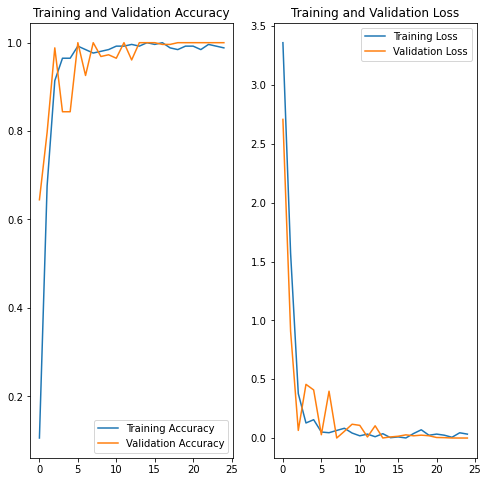

In [93]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Klasifikasi Data

In [ ]:
import numpy as np 
import keras
from keras.preprocessing import image
import keras.utils as image
import os

Saving IMG20221205203240.jpg to IMG20221205203240 (1).jpg
1/1 [==============================] - 0s 39ms/step
IMG20221205203240.jpg
ini adalah gambar :  6


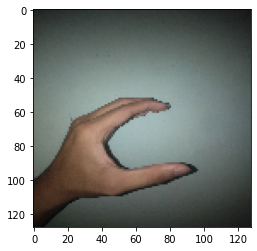

In [ ]:



upload_foto = files.upload()

for fn in upload_foto.keys() :
  path = fn
  img = image.load_img(path, target_size= (128,128))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)


  print(fn)
  class_list = os.listdir("/content/Indian")
  
  for j in range(42):
    if classes[0][j] == 1. :
      print("ini adalah gambar : ", class_list[j])
      break